In [ ]:
夏普比率（Sharpe Ratio）：即CAL的斜率
经济解释：计算投资组合每承受一单位总风险，会产生多少的超额报酬。
即代表投资人每多承担一分风险，可以拿到几分超额报酬

In [3]:
def SR(Rp,Rf,Vp):
    '''计算夏普比率
    Rp:表示投资组合的年化收益率；
    Rf:表示年化无风险收益率；
    Vp:表示投资组合的年化波动率。'''
    return  (Rp-Rf)/Vp

In [5]:
SR(0.7,0.3,0.6)

0.6666666666666666

<AxesSubplot:xlabel='交易日期'>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20132 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20132 missing from current font.
  font.set_text

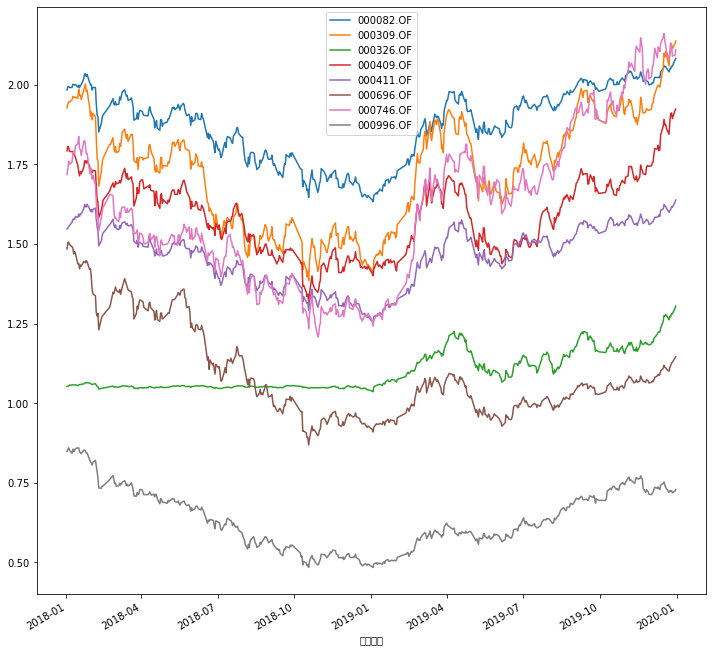

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False
fund=pd.read_excel('/Users//stanley//Desktop//基金绩效评价数据.xls','基金累计净值',header=0,index_col=0)
#fund=pd.read_excel('D:/欧晨的金学智库/风险管理基础/基金绩效评价数据.xls','基金累计净值',header=0,index_col=0)
fund.plot(figsize=(12,12))


In [5]:

R_fund=np.log(fund/fund.shift(1)) #生成基金日收益率序列
R_fund=R_fund.dropna()
R_mean=R_fund.mean()*252          #计算年化平均收益率
Sigma=R_fund.std()*np.sqrt(252)   #计算年化平均波动率 年华波动率 = 日波动率 * np.sqrt(252)
R_f=0.03
SR_2years=SR(Rp=R_mean,Rf=R_f,Vp=Sigma)
print('2018年~2019年年平均夏普比率\n',SR_2years) #输入\n表示输出时换行

2018年~2019年年平均夏普比率
 000082.OF   -0.036003
000309.OF    0.101759
000326.OF    0.790433
000409.OF    0.033615
000411.OF   -0.002470
000696.OF   -0.793317
000746.OF    0.318176
000996.OF   -0.497716
dtype: float64


In [6]:
结果分析：其中夏普比率有4支基金的值为正数，说明这4支基金的业绩表现相对较好。

此外，在适用夏普比率的时候应当注意:

①夏普比率不存在基准点，因此其大小本身没有什么意义，只有在与其他组合的比较中才有价值；

②衡量的为历史表现，不能代表基金未来的业绩；

③计算结果与时间跨度、收益计算的频率选择有密切关系，选择不同则计算结果也不同。



SyntaxError: invalid character in identifier (<ipython-input-6-2031132aac40>, line 1)

In [7]:
索提诺比率（Sortino Ratio）
索提诺比率是一种衡量投资组合相对表现的方法。与夏普比率(Sharpe Ratio)有相似之处，
但索提诺比率运用下偏标准差而不是总标准差，以区别不利和有利的波动。

经济解释：用下行标准差，就是说，只考虑对收益不利的波动。具体计算来说，只统计收益低于无风险回报率的时候。
也就是对亏损可能比赚钱更有兴趣，所以我把亏损的这部分拿出来算方差。该比率同样是计算投资组合每承受一单位
总风险（下半方差），能够产生多少的超额报酬。


SyntaxError: invalid character in identifier (<ipython-input-7-9e60003b54a7>, line 1)

In [8]:

def SOR(Rp,Rf,Vpl):
    '''计算索提诺比率
    Rp:表示投资组合的年化收益率；
    Rf:表示年化无风险收益率；
    Vp:表示投资组合的年化下行标准差。'''
    return (Rp-Rf)/Vpl

In [9]:

Vp_lower=np.zeros_like(R_mean)  #生成放置基金收益率下行标准差的初始数组
for i in range(len(Vp_lower)):
    R_neg=R_fund.iloc[:,i][R_fund.iloc[:,i]<0] #生成基金收益率为负的时间序列   花式索引
    Vp_lower[i]=np.sqrt(252)*np.sqrt(np.sum(R_neg**2)/len(R_neg)) #计算年化下行标准差 
print(R_fund.columns[i],'收益率下行标准差',round(Vp_lower[i],4))
SOR_2years=SOR(Rp=R_mean,Rf=R_f,Vpl=Vp_lower)
print('2018年~2019年年平均索提诺比率\n',SOR_2years)


000996.OF 收益率下行标准差 0.2186
2018年~2019年年平均索提诺比率
 000082.OF   -0.035559
000309.OF    0.102835
000326.OF    0.736442
000409.OF    0.034144
000411.OF   -0.002433
000696.OF   -0.733149
000746.OF    0.315590
000996.OF   -0.499127
dtype: float64


In [10]:
R_fund.iloc[:,i]<0

交易日期
2018-01-03    False
2018-01-04    False
2018-01-05     True
2018-01-08     True
2018-01-09    False
              ...  
2019-12-25     True
2019-12-26    False
2019-12-27     True
2019-12-30    False
2019-12-31    False
Name: 000996.OF, Length: 486, dtype: bool

In [11]:
结果分析：其中索提诺比率有4支基金的值为正数，说明这4支基金的业绩表现相对较好。

此外，在使用索提诺比率的时候应当注意:

如果收益率的分布是左偏的，也就是出现亏损的样本数量多于盈利的样本数量，相比于夏普比率而言，索提诺比率将会更加适合。
但是索提诺比率在日常运用中，如果在某个观测期限内，投资组合的收益率为负数的样本量很少甚至没有，则不应使用索提诺比率。

SyntaxError: invalid character in identifier (<ipython-input-11-b60686493d18>, line 1)

In [12]:
特雷诺比率（Treynor ratio）
经济解释：特雷诺比率的含义就是承担每单位系统风险资产获得的超额报酬（超过无风险利率rf）。
特雷诺比率越大，投资资产的表现就越好；反之，表现越差。

SyntaxError: invalid character in identifier (<ipython-input-12-dc39ff4cfff7>, line 1)

In [13]:

def TR(Rp,Rf,beta):
    '''计算特雷诺比率
    Rp:表示投资组合的年化收益率；
    Rf:表示年化无风险收益率；
    Vp:表示投资组合的贝塔值。'''
    return (Rp-Rf)/beta

/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20132 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20132 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/

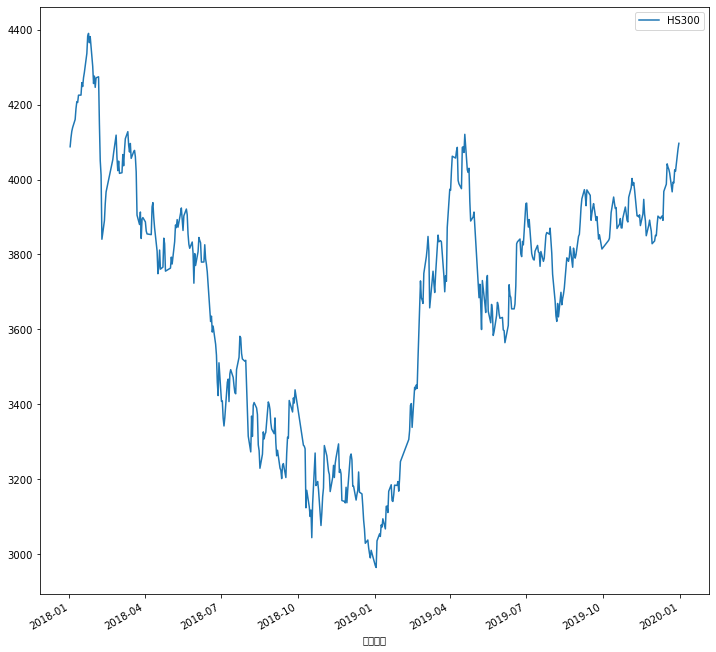

In [14]:

HS300=pd.read_excel('/Users//stanley//Desktop//基金绩效评价数据.xls','沪深300',header=0,index_col=0)
HS300.plot(figsize=(12,12))
R_HS300=np.log(HS300/HS300.shift(1))
R_HS300=R_HS300.dropna()

In [18]:
R_fund

,000082.OF,000309.OF,000326.OF,000409.OF,000411.OF,000696.OF,000746.OF,000996.OF
交易日期,,,,,,,,
2018-01-03,0.005028,0.005689,0.000950,0.007778,0.001937,0.013387,0.010999,0.007051
2018-01-04,0.000501,0.004117,0.000949,-0.002216,0.003221,0.001329,0.013154,0.005838
2018-01-05,-0.001505,-0.000514,0.001896,-0.006678,0.001927,-0.005326,-0.005127,-0.008182
2018-01-08,0.000000,0.003591,0.000947,-0.000559,0.006398,-0.004684,0.003421,-0.011807
2018-01-09,0.005008,0.005617,0.000000,0.000559,0.005723,-0.002014,0.017490,0.015321
...,...,...,...,...,...,...,...,...
2019-12-25,0.000488,0.003802,-0.000786,0.011591,0.001245,0.005381,0.010847,-0.004147
2019-12-26,0.003893,0.008503,0.007208,0.001570,0.005581,0.007130,-0.005644,0.002766
2019-12-27,0.000000,-0.005660,-0.000156,-0.009459,-0.001238,0.001775,-0.013774,-0.008322


In [16]:

#计算每个基金的贝塔值
betas=np.zeros_like(R_mean)  #生成一个放置基金贝塔值的日收益率序列
cons=np.zeros_like(R_mean)   #生成一个放置线性回归方程的常数项初始数组
X=R_HS300                    #设定自变量的样本值
X_addcons=sm.add_constant(X)  #对自变量的样本值增加一列常数项
for i in range(len(R_mean)):
    Y=R_fund.iloc[:,i]      #设定因变量的样本值
    model=sm.OLS(endog=Y,exog=X_addcons)  #构建普通最小二乘法线性回归模型
    result=model.fit()      #生成一个线性回归的结果对象
    cons[i]=result.params[0] #生成线性回归的常数项数组
    betas[i]=result.params[1] #生成基贝塔值的数组
    print(R_fund.columns[i],'贝塔值',round(betas[i],4))
#计算特雷诺比率
TR_2years=TR(Rp=R_mean,Rf=R_f,beta=betas)
print('2018年~2019年年平均特雷诺比率\n',round(TR_2years,4))

000082.OF 贝塔值 0.6199
000309.OF 贝塔值 1.0426
000326.OF 贝塔值 0.3318
000409.OF 贝塔值 0.7912
000411.OF 贝塔值 0.6968
000696.OF 贝塔值 0.858
000746.OF 贝塔值 0.925
000996.OF 贝塔值 0.8917
2018年~2019年年平均特雷诺比率
 000082.OF   -0.0077
000309.OF    0.0226
000326.OF    0.2459
000409.OF    0.0083
000411.OF   -0.0005
000696.OF   -0.1912
000746.OF    0.0828
000996.OF   -0.1224
dtype: float64


In [17]:
result.summary()  
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              000996.OF   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     1189.
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          1.77e-132
Time:                        17:02:55   Log-Likelihood:                 1693.6
No. Observations:                 486   AIC:                            -3383.
Df Residuals:                     484   BIC:                            -3375.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.000     -0.943      0.3

In [ ]:
结果分析： 其中有3支基金的贝塔值在0.8~1.2之外，说明其并不接近于市场的系统风险。
而其他基金与沪深300的相关系数较高，采用沪深300作为拟合线性回归是比较合适的。

特雷诺比率有4支基金的值为正数，说明这4支基金的业绩表现相对较好。